In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
scores=pd.read_csv("C:/Users/user/Downloads/student_scores.csv")

In [3]:
scores.shape

(25, 2)

In [4]:
scores.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
hours=scores['Hours']
scorez=scores['Scores']

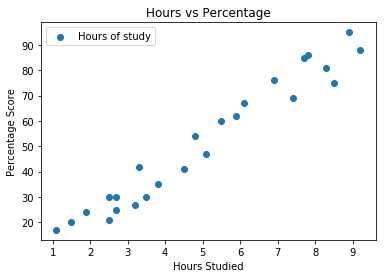

In [9]:
plt.scatter(hours,scorez,label='Hours of study')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend(loc='upper left')
plt.show()

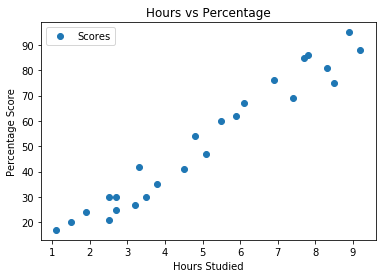

In [10]:
#alternatively easier way of doing it

scores.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Implementing the linear regression model

In [11]:
# picking the values of X and y using the iloc function; X=hours column and y=percentage scores column

X = scores.iloc[:, :-1].values
y = scores.iloc[:, 1].values

### predictive modelling 

In [12]:
#splitting the data ito training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### we expect an equation like 
y=mx+c
hence we look for values of m and c

In [14]:
regressor.coef_

array([9.91065648])

In [15]:
regressor.intercept_

2.018160041434683

### hence our equation will look like 
y=9.9107x+2.0187

### how to make prediction

In [20]:
y_pred = list(regressor.predict(X_test))

In [32]:
y_pred_final=[]
for i in y_pred:
    y_pred_final.append(int(i))
    
y_pred_final
    

[16, 33, 75, 26, 60]

In [28]:
y_real=list(y_test)

In [29]:
data={'Prediction':y_pred_final,'Real':y_real}

In [30]:
data_df=pd.DataFrame(data)

In [31]:
data_df

,Prediction,Real
0,16,20
1,33,27
2,75,69
3,26,30
4,60,62


### Model evaluation

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

In [35]:
### i.e
scores['Scores'].mean()

51.48

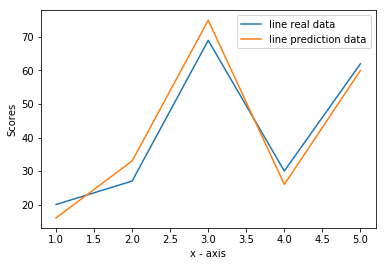

In [41]:
plt.plot([1,2,3,4,5], data_df['Real'],label = "line real data") 
plt.plot([1,2,3,4,5], data_df['Prediction'],  label = "line prediction data") 
plt.xlabel('x - axis') 
# Set the y axis label of the current axis.
plt.ylabel('Scores')
plt.legend() 
plt.show()